In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
# dict of subjects (keys) and the list of publications they appear in (values).
types = json.load(open('../../../data/json/dim/all/relevant_types.json'))
type_clusters = json.load(open('../../oai_dc/types/clustered_types.json'))
depositonce = json.load(open('../../../data/json/dim/depositonce/relevant_subjects.json'))
edoc = json.load(open('../../../data/json/dim/edoc/relevant_subjects.json'))
refubium = json.load(open('../../../data/json/dim/refubium/relevant_subjects.json'))
subjects = dict(depositonce, **edoc, **refubium)
counts = {k: len(v) for k, v in subjects.items()}

In [3]:
def group_counts(counts):
    subject_sizes = dict()
    for subject, cnt in counts.items():
        if cnt not in subject_sizes:
            subject_sizes[cnt] = 0
        subject_sizes[cnt] += 1
    return sorted(subject_sizes.items())

In [4]:
sorted_sizes = group_counts(counts)
print(f'In total, there are {len(counts)} english documents in the repositories that are either theses or publications.')
print(f'On average, a document has {round(sum(counts.values()) / len(counts), 2)} subjects.')
print(f'{sorted_sizes[0][1]} of them have no subjects.')

In total, there are 29399 english documents in the repositories that are either theses or publications.
On average, a document has 3.37 subjects.
11091 of them have no subjects.


In [5]:
def get_type(id):
    for cluster in type_clusters:
        for t in type_clusters[cluster]:
            if t.lower().replace(' ', '').replace('doc-type:', '') == types[id]:
                return cluster

In [6]:
theses, publications = {}, {}
for id in counts:
    if get_type(id) == 'thesis':
        theses[id] = counts[id]
    elif get_type(id) == 'publication':
        publications[id] = counts[id]
thesis_groups = group_counts(theses)
publication_groups = group_counts(publications)

In [7]:
def get_bar_args(group_counts, cutoff=10):
    n_subjects, cnt = zip(*group_counts)
    x = list(n_subjects)[:cutoff]
    x.append('more')
    y = list(cnt[:cutoff])
    y.append(sum(cnt[cutoff:]))
    return x, y

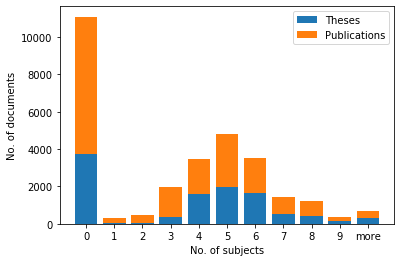

In [8]:
tx, ty = get_bar_args(thesis_groups)
px, py = get_bar_args(publication_groups)
plt.bar(range(len(tx)), height=ty, label='Theses')
plt.bar(range(len(px)), height=py, bottom=ty, label='Publications')
plt.xlabel('No. of subjects')
plt.ylabel('No. of documents')
plt.xticks(range(len(px)), px)
plt.legend()
plt.show()

In [9]:
print('Documents with the most subjects.')
sorted(counts.items(), key=lambda item: item[1], reverse=True)[:10]

Documents with the most subjects.


[('oai:edoc.hu-berlin.de:18452/17163', 186),
 ('oai:edoc.hu-berlin.de:18452/18702', 79),
 ('oai:edoc.hu-berlin.de:18452/3826', 54),
 ('oai:edoc.hu-berlin.de:18452/3851', 44),
 ('oai:edoc.hu-berlin.de:18452/3820', 44),
 ('oai:edoc.hu-berlin.de:18452/3859', 36),
 ('oai:edoc.hu-berlin.de:18452/3846', 35),
 ('oai:edoc.hu-berlin.de:18452/17797', 34),
 ('oai:edoc.hu-berlin.de:18452/18324', 34),
 ('oai:edoc.hu-berlin.de:18452/3858', 32)]